In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from IPython.display import clear_output

# Using my custom library
sys.path.append('..\\') # Since TLBP2Control folder is in root project dir
from TLBP2Control import TLBP2

In [2]:
bpDevice = TLBP2(debug=False)
# If we are in debug mode, make sure to manaully start the server executable before
# attempting to connect
# This can be found at TLBP2Control/CSServer/TLBP2PipeConnection.exe
bpDevice.connect()

0

In [3]:
bpDevice.disconnect()

error: (232, 'WriteFile', 'The pipe is being closed.')

In [3]:
bpDevice.getStatus()

0

In [3]:
bpDevice.getMeasurement()

{'centroid': array([ 576.0971 , -913.73065]),
 'peak': array([1879.4104, -697.6923]),
 'peak_intensity': array([3.5870996, 3.3502   ]),
 'drum_speed': 9.966860189868687,
 'beam_width': array([7305.932,    0.   ]),
 'gaussian_fit_params_x': array([3.8269165e+03, 7.7758400e+03, 8.8678990e+02, 8.1705210e-01]),
 'gaussian_fit_params_y': array([3.4947178e+03, 6.8078467e+03, 8.4416260e+02, 8.6144644e-01])}

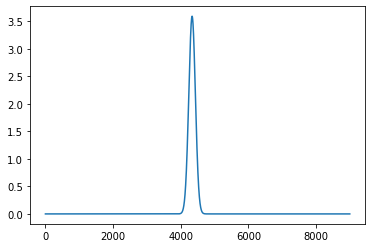

{'centroid': array([  289.28387, -2947.3936 ]), 'peak': array([1694.5266,  327.4749]), 'peak_intensity': array([0.06776583, 0.05640536]), 'drum_speed': 10.1875528479304, 'beam_width': array([0., 0.]), 'gaussian_fit_params_x': array([4.3371430e+03, 9.4425540e+03, 3.5955536e+00, 0.0000000e+00]), 'gaussian_fit_params_y': array([3.9968628e+03, 8.8942290e+03, 2.5561530e+00, 0.0000000e+00])}


In [7]:
measure = bpDevice.getMeasurement()
c, w, a, p = measure["gaussian_fit_params_x"]

def gaussian(x, c, w, a):
    return a * np.exp(- (x - c)**2 / (2 * w))

xArr = np.linspace(0, 9000, 9000)
funcArr = [gaussian(x, c, w, a) for x in xArr]
plt.plot(xArr, funcArr)
plt.show()
print(measure)

KeyboardInterrupt: 

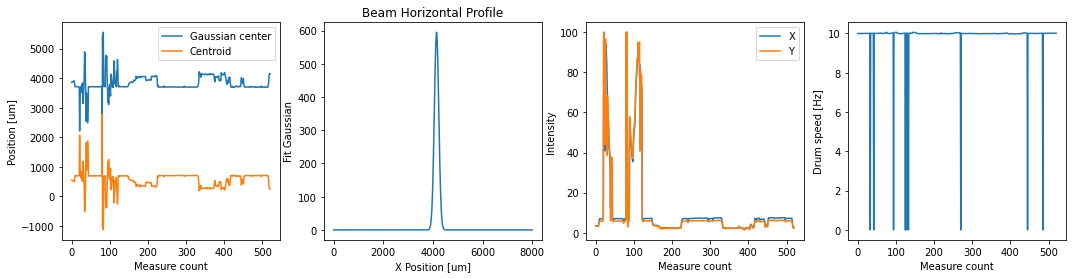

In [11]:
centerPos = []
drumSpeed = []
intensityX = []
intensityY = []
centroidPos = []

while True:
    measure = bpDevice.getMeasurement()
    
    if measure == None or measure["drum_speed"] < 1:
        continue
        
    cx, wx, ampx, px = measure["gaussian_fit_params_x"]
    cy, wy, ampy, py = measure["gaussian_fit_params_y"]
    
    centerPos.append(cx)
    centroidPos.append(measure["centroid"][0])
    drumSpeed.append(measure["drum_speed"])
    intensityX.append(measure["peak_intensity"][0])
    intensityY.append(measure["peak_intensity"][1])
    
    def gaussian(x, c, w, a):
        return a * np.exp(- (x - c)**2 / (2 * w))

    xArr = np.linspace(0, 8000, 300)
    gausXArr = [gaussian(x, cx, wx, ampx) for x in xArr]
    gausYArr = [gaussian(y, cy, wy, ampy) for y in xArr]
    
    heatMap = np.outer(gausXArr, gausYArr)
    
    clear_output(wait=True)
    
    fig, ax = plt.subplots(1, 4, figsize=(18, 4))
    
    ax[0].plot(centerPos, label='Gaussian center')
    ax[0].plot(centroidPos, label='Centroid')
    ax[0].legend()
    ax[0].set_xlabel("Measure count")
    ax[0].set_ylabel("Position [um]")
    
    ax[1].plot(xArr, gausXArr)
    ax[1].set_title('Beam Horizontal Profile')
    #ax[1].pcolor(heatMap)
    ax[1].set_xlabel('X Position [um]')
    #ax[1].set_ylabel('Y Position [um]')
    
    ax[1].set_ylabel('Fit Gaussian')
    
    ax[2].plot(intensityX, label='X')
    ax[2].plot(intensityY, label='Y')
    ax[2].legend()
    ax[2].set_xlabel('Measure count')
    ax[2].set_ylabel('Intensity')
    
    ax[3].plot(drumSpeed)
    ax[3].set_xlabel("Measure count")
    ax[3].set_ylabel("Drum speed [Hz]")
    
    fig.tight_layout()
    plt.show()
    
    #sleep(.02)